<a href="https://colab.research.google.com/github/AdityaNikhil/Neural_Networks/blob/master/MNIST_Classification_Using_NeuralNetworks(Intuition~Part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective is to classify MNIST dataset which consists of several handwritten digits using Neural Networks.(Part 2)
#### note : All the images included in this project are made from scratch using windows powerpoint and few definitions or theory have been taken from other sources which are also mentioned.  
This is part 2 of neural network series, if u don't understand anything, checkout **part 1** code in my github where the basics were explained clearly.

## Importing necessary modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from IPython.display import clear_output
#from IPython.display import display, Math, Latex

In [0]:
data = pd.read_csv('sample_data/mnist_train_small.csv')

In [0]:
#Preparing target and features variables
target = data['6'].copy()
features = data.drop(['6'],axis = 1).copy()

In [0]:
#Preparing Tensorflow PlaceHolders
target_PH = tf.placeholder("float64",[None,10])
features_PH = tf.placeholder("float64",[None,784])

In [0]:
#Preparing Tensorflow Variables
m1 = np.random.randn(784,784)
m1 = tf.Variable(m1)
c1 = np.random.randn(1,1)
c1 = tf.Variable(c1)

m2 = np.random.randn(784,784)
m2 = tf.Variable(m2)
c2 = np.random.randn(1,1)
c2 = tf.Variable(c2)

m3 = np.random.randn(784,784)
m3 = tf.Variable(m3)
c3 = np.random.randn(1,1)
c3 = tf.Variable(c3)

m4 = np.random.randn(784,784)
m4 = tf.Variable(m4)
c4 = np.random.randn(1,1)
c4 = tf.Variable(c4)

m5 = np.random.randn(784,784)
m5 = tf.Variable(m5)
c5 = np.random.randn(1,1)
c5 = tf.Variable(c5)

m6 = np.random.randn(784,10)
m6 = tf.Variable(m6)
c6 = np.random.randn(1,1)
c6 = tf.Variable(c6)

In [0]:
#Dot Product
L1Out = tf.nn.sigmoid(tf.matmul(features_PH,m1))+c1
L2Out = tf.nn.sigmoid(tf.matmul(L1Out,m2))+c2
L3Out = tf.nn.sigmoid(tf.matmul(L2Out,m3))+c3
L4Out = tf.nn.sigmoid(tf.matmul(L3Out,m4))+c4
L5Out = tf.nn.sigmoid(tf.matmul(L4Out,m5))+c5
L6Out = tf.nn.sigmoid(tf.matmul(L5Out,m6))+c6

# Activation Functions
As u can see in the above code, there's this special line which says, **tf.nn.sigmoid**. That is called an Activation Function and it is what is going to tune our cost and give optimal weights and bias.

---
#### What is an Activation function?
An Activation function is a **special ingredient**(formula) which is multiplied along  with the gradients which will help the the gradient to not fall in a local minimimum. Hence this will help us to get a global minimum and optimal weights(& bias).
##### ( I know it is a very NAIVE definition )
To understand how Activations work, we need to understand what is **Linearity** and **Non Linearity**.


*   **Linearity** : simply means a hypothesis function following a linear(line) nature. 
*   **Non Linearity** : simply means in a hypothesis function there's a little curvature(curve) in the linearity(Line).


---


In Neural Networks, we make function of functions to produce optimal weights right. But that function of function which is nothing but Hypothesis is producing a line of degree **1**.(Which in turn in higher dimensions is called a HYPYER-PLANE).

 $$ m3(m2.(m1.(m0*.x+c0)+c1)+c2)+c3 $$
 The above equation produces the hyp. function with degree **1**.


---


 Due to this, there's a large difference in Actual points to the predicted values. Because, the data in higher dimensions can become a little **curvy** and straight line fails to mimic the curvy nature.
Below images illustrates this clearly.

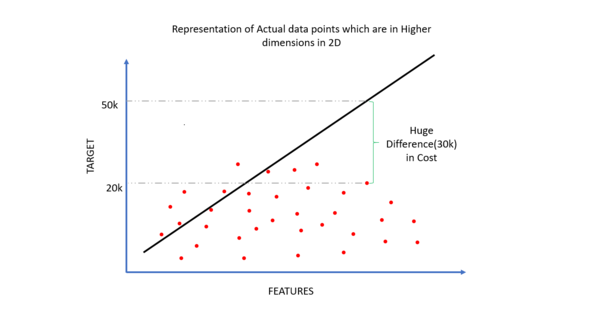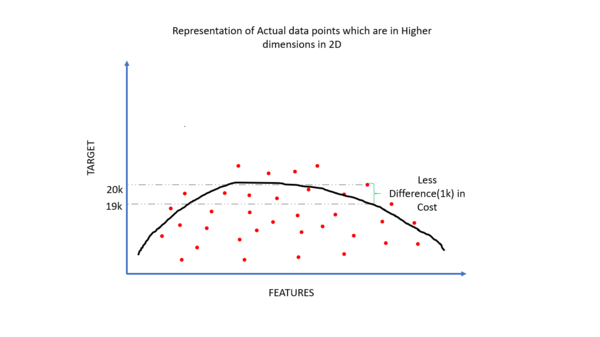
### Hence to make it non-Linear, Activation Functions are used.


## Working and Types of Activation Functions :
There are many types of Activation Functions, widely used and accepted ones are listed below,

1.   Sigmoid Activation function
2.   Tanh Activation function
3.   RELU Activation function
4.   Leaky RELU Activation function

---
### 1)<ins>Sigmoid Act. Function</ins>
As we know the formula of sigmoid which is,
$$\frac{1}{1+e^{-Z}}$$
Where, **Z = m.x + c**
It returns us values between 0 to 1. This when multiplied to our gradient descent, that returns us values from 0 to 1. But the problem here is, this produces us gradient values in only single direction. And it is **0.5 centered**. <br>
**What we mean by gradients pointing in same direction?**<br>
While we're interested to reduce our weights and bias we subtract them with their derivatives right. In order to find the most minimum value in the derivative, sometimes, the derivative falls into the local minimum instead of global minimum. Below image illustrates this.
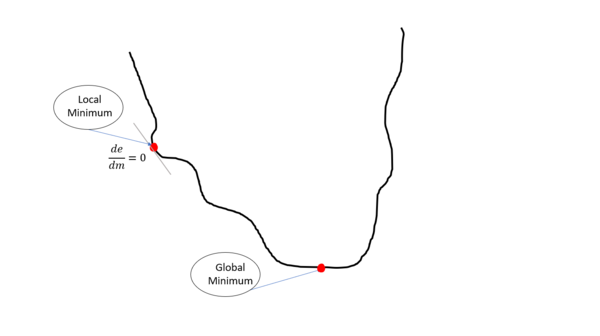<br>
Now it is necessary for us to keep on changing the direction of the derivative instead of getting stuck in same direction and fall in local minimum. <br>
**What we mean by 0.5 centered?**<br>
It means that, the vaues are always positive and are between 0 to 1.<br>
But we don't want our gradients to always go in single direction because it may get away from our global minimum value.<br>
**And also there's a high chance of gradient vanishing**<br>
which means, the gradient of the weight may result to "0". And there'll be no change in the value of weight. This happens when the value of sigmoid increases and hence there's a high chance of derivative to fall into "0".Below image illustrates this,
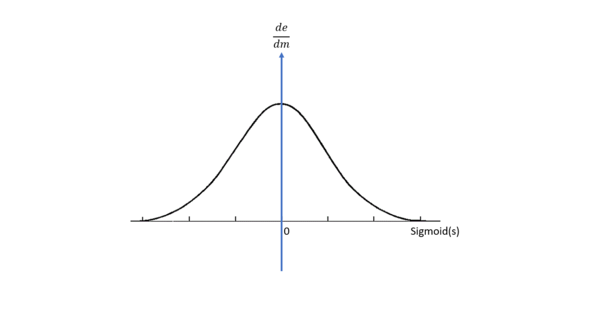

$$ m = m - \frac{de}{dm} $$
$$If, \frac{de}{dm}  = 0$$
$$ m = m - 0 $$
$$(i.e)$$
$$ m $$
So, Sigmoid Activation funcition is not very likely recommended function.<br>
Due to two problems,


1.   Gradient Vanishing
2.   Gradients pointing in same direction<br>

Lets check yet another Act. Function which may fix this.







### 2)<ins>Tanh Act. Function</ins>
The formula for Tanh is,
$$tanh = \frac{2}{1+e^{-2x}}-1$$
This is yet another Activation function which solves the issue of Gradients pointing in same direction.<br>
It is **0 centered**, which means, the values range from -1 to 1.<br>
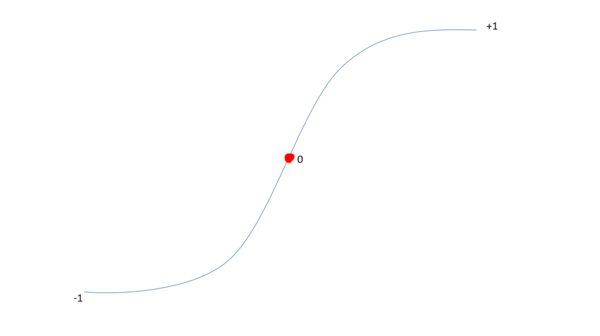<br>
But this does not solve the **Second issue which is Gradient vanishing**.
So we need to checkout another Activation function.

### <ins>RELU Act. Function </ins>
This Activation function which determines max of 2 numbers as represented below,
$$ max(0,X)$$
where X is any scalar value.If,


*   X > 0, then X is considered or else,
*   0 is considered<br>

**Any value beyond 0 or less than X are going to be 0.**
So there's a slight issue with Gradient Vanishing here. <br>
Other than that, the gradients will be constant in one direction like in below image.
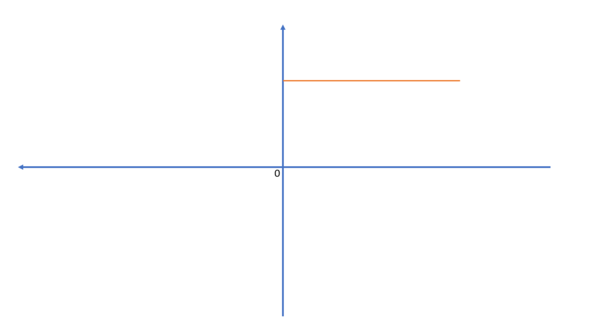








### <ins>LEAKY RELU Act.Function</ins>
This Act. function fixes the issue with almost all above mentioned functions.It is represented as,
$$ LR = Max(\epsilon x,x)$$
Where, $\epsilon$ = 0.000001 (very small value)<br>
In this even when value of neuron tends to become "-ve", the gradients won't be vanished instead they multiply with $\epsilon$ and produce a very small value.<br>
You can see from below graph that the value of negative gradients tend to be very small.
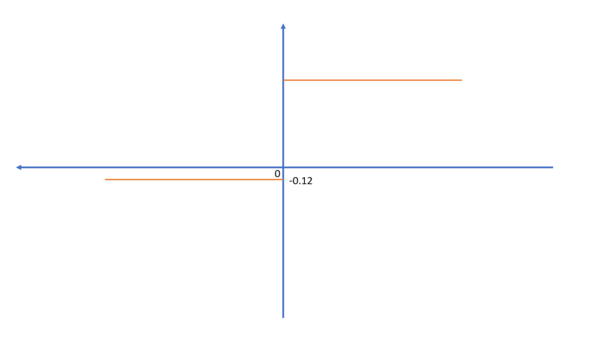

In [0]:
#OneHot encoding
def OneHot(x):
  zeros = [0]*10
  for i in range(len(zeros)):
    zeros[x] = 1
  return zeros


In [41]:
target_OH = []
for i in range(len(target)):
  target_OH.append(OneHot(target.iloc[i]))
target_OH = np.array(target_OH)
target_OH.shape

(19999, 10)

In [0]:
cost = tf.reduce_mean((target_PH - L6Out)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
minimizer = optimizer.minimize(cost)
init = tf.global_variables_initializer()
s = tf.Session()
s.run(init)

# Types of Gradient Descent
There are mainly 3 types of gradient descents,


1.   **Regular Gradient descent** : Here we take whole data for training.Hence it is very time consuming.
2.   **Stochastic Gradient descent** : Here we consider **1** instance(row) at a time for the training.
3.   **Batch Gradient descent** : Here we consider a set of instances(rows) at a time for the training.<br>

In the below code,we have made a variable called **random_indices** which are given by another variable called **BATCH_SIZE** which produces random instances at a time. <br>
Then we're using them inside our training loop, in every iteration, **Amount of number of instances given by BATCH_SIZE are produced and gone into the feed_dict and they produce random instances of both features and target**.
<br><br>
We can see that the loop iterates very fast.



Iteration :  99 error :  0.09000027912304794


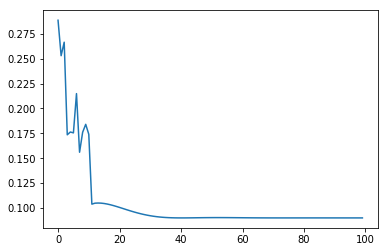

In [61]:
BATCH_SIZE = 50
it = 100
error = []
for i in range(it):
  random_indices = np.random.randint(0,len(data),size = BATCH_SIZE)
  FD = {features_PH: np.array(pd.DataFrame(features).iloc[random_indices]),target_PH:np.array(pd.DataFrame(target_OH).iloc[random_indices])}
  s.run(minimizer, feed_dict = FD)
  clear_output(True)
  error.append(s.run(cost,feed_dict = FD))
  print("Iteration : ",i,"error : ",s.run(cost,feed_dict = FD))
plt.plot(error)
plt.show()

We can see that there's a lot of difference in the **error value** above.
# Hence, we can conclude that, the Activation functions and type of Gradient descent and also the type of Optimisation Function used impact a large changes in the cost function.
#### note : Optimisation Functions will be explained clearly in future.